<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220411_CH9_unsupervised_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##3. K-means를 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법

1. 실루엣 점수silhouette score: 모든 샘플에 대한 실루엣 계수의 평균으로, (b-a) / max(a, b)
    a: 동일한 클러스터에 있는 다른 샘플까지 평균 거리(클러스터 내부의 평균 거리)
    b: 가장 가까운 클러스터까지의 평균 거리(즉 가장 가까운 클러스터의 샘플까지 평균 거리)

2. 이너셔inertia: 최적의 솔루션을 판단하는 성능 지표. 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리. kmeans는 이너셔가 가장 낮은 모델을 반환함

##5. 대규모 데이터셋으로 확장할 수 있는 군집 알고리즘 두 개? 밀도가 높은 지역을 찾는 군집 알고리즘 두 개?

1. 
- 병합 군집: 클러스터 계층을 밑바닥부터 위로 쌓아 구성. 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있음
- BIRCH(balanced iterative reducing and clustering using hierarchies): 대규모 데이터 세트를 위해 만들어짐. 특성 개수가 20개 이하이면 배치 k-means보다 빠르고 비슷한 결과를 산출
2.
- DBSCAN: 밀집된 연속적 지역을 클러스터로 정의

알고리즘이 각 샘플에서 작은 거리인 ε(입실론) 내에 샘플이 몇 개 놓여 있는지 확인
이 지역을 샘플의 ε-이웃ε-neighbourhood라고 함
자신을 포함해 ε-이웃 내에 적어도 min_samples개의 샘플이 있다면 이를 핵심 샘플core instance로 간주.
핵심 샘플: 밀집된 지역에 있는 샘플
핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속함. 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터 생성
핵심 샘플도 아니고 이웃도 아닌 샘플은 이상치로 판단

- 평균-이동mean-shift

각 샘플을 중심으로 한 원을 그린 후, 원마다 모든 샘플의 평균을 구함
원의 중심을 평균점으로 이동시키고 모든 원이 움직이지 않을 때까지 과정을 반복 (원의 중심이 포함된 샘플의 평균점일 때까지)
모양이나 개수에 상관없이 클러스터를 찾을 수 있음
하이퍼 파라미터 수도 적음
국부적인 밀집도 추정에 의존해 대규모 데이터 세트에는 적합하지 않음

##8. 가우시안 혼합이 무엇인지. 어떤 작업에 사용할 수 있는지.

1. 가우시안 혼합(GMM): 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

2. 밀도 추정, 이상치 탐지

##10. 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
olivetti = sklearn.datasets.fetch_olivetti_faces()

In [31]:
?olivetti

In [3]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

In [7]:
for i, j in strat_split.split(olivetti.data, olivetti.target):
     train_valid_idx, test_idx = i, j

In [8]:
i, j

(array([236, 330, 109, 369, 251,  60,  63, 288,  95, 262,  65, 276, 213,
         86, 261, 302, 337, 345, 105, 340, 216, 245, 317, 167, 184, 134,
         77, 296, 305, 274, 263,  94, 351,  14, 121, 311,  74, 112, 116,
         88, 158,  11, 358, 282, 380, 283,  38,  70, 204, 395, 290, 250,
        334, 399, 336, 287,   5, 232, 144,  40,  82, 202, 145, 346, 364,
        187,  87, 267, 222, 131, 227, 326,  64, 398,  32,  72, 175, 237,
         42,  79, 106, 275, 367, 143,  45, 393, 207, 316,  71,  21,  53,
        177, 344,  48, 165, 215,   9, 252, 224, 235, 189, 156, 374, 180,
        342,  93, 196, 313, 249,  13, 383, 181,  47, 329, 123, 256,  62,
        234, 163, 327, 151, 259, 130, 142,  23, 388, 335, 239, 293, 124,
         92,  59, 223,  31,   3, 272, 244,  29, 266, 125, 229,  61, 324,
        394,  36, 200, 225, 242, 349, 128, 386, 389, 365, 303, 231, 348,
        381, 226, 281, 233,  20, 301, 172,  84, 366, 298, 149, 117, 129,
        170, 199, 271, 273,   4,  99,  81,  34, 148

In [9]:
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

In [10]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)

In [11]:
for i, j in strat_split.split(X_train_valid, y_train_valid):
     train_idx, valid_idx = i, j

In [12]:
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [13]:
X_train.shape, y_train.shape

((280, 4096), (280,))

In [14]:
X_valid.shape, y_valid.shape

((80, 4096), (80,))

In [15]:
X_test.shape, y_test.shape

((40, 4096), (40,))

In [19]:
from sklearn.cluster import KMeans

In [17]:
k_list = list(range(5, 100, 5))
k_list

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [20]:
kmeans_list = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    kmeans_list.append(kmeans)

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score = [silhouette_score(X_train, model.labels_) for model in kmeans_list]

In [24]:
best_score = max(silhouette_score)
best_index = silhouette_score.index(best_score)
best_k = k_list[best_index]
best_score, best_index, best_k

(0.21011257, 16, 85)

In [25]:
best_kmeans = kmeans_list[best_index]

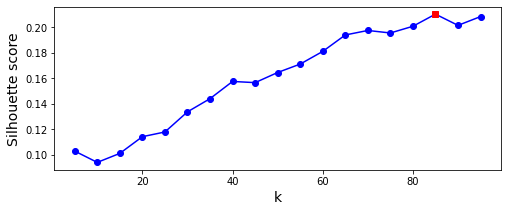

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 3))
plt.plot(k_list, silhouette_score, 'bo-')
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

cluster 0


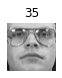

cluster 1


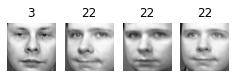

cluster 2


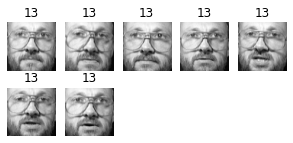

cluster 3


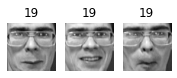

cluster 4


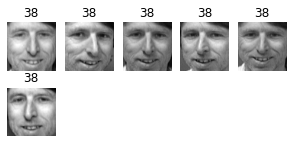

cluster 5


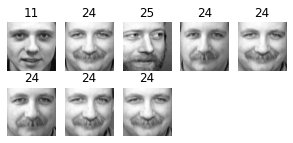

cluster 6


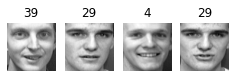

cluster 7


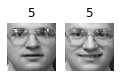

cluster 8


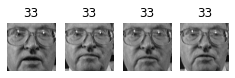

cluster 9


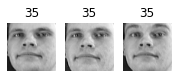

cluster 10


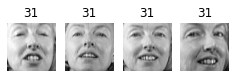

cluster 11


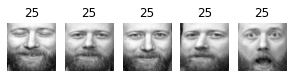

cluster 12


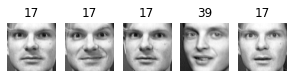

cluster 13


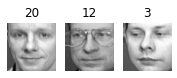

cluster 14


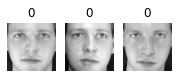

cluster 15


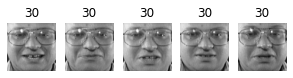

cluster 16


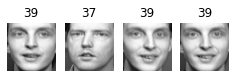

cluster 17


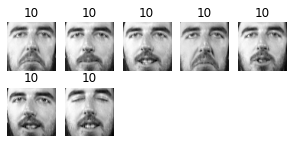

cluster 18


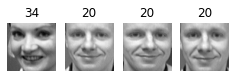

cluster 19


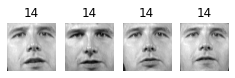

cluster 20


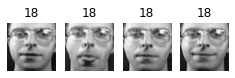

cluster 21


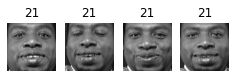

cluster 22


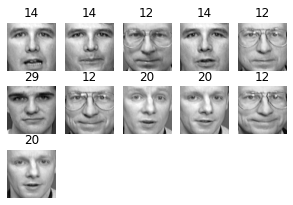

cluster 23


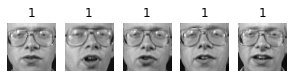

cluster 24


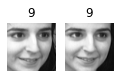

cluster 25


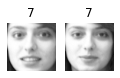

cluster 26


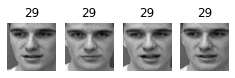

cluster 27


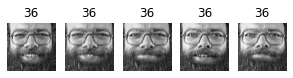

cluster 28


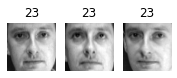

cluster 29


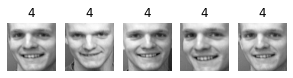

cluster 30


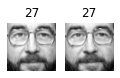

cluster 31


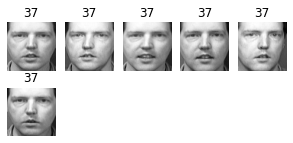

cluster 32


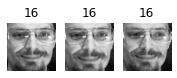

cluster 33


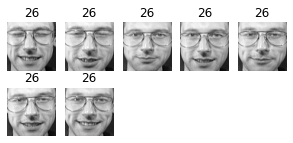

cluster 34


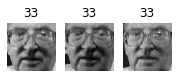

cluster 35


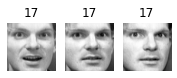

cluster 36


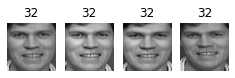

cluster 37


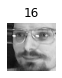

cluster 38


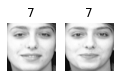

cluster 39


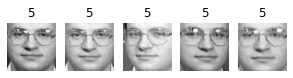

cluster 40


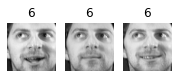

cluster 41


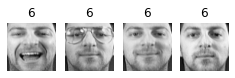

cluster 42


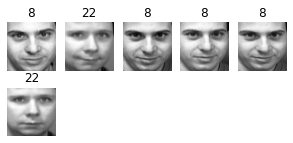

cluster 43


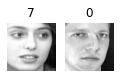

cluster 44


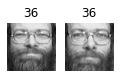

cluster 45


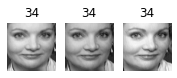

cluster 46


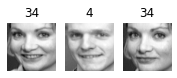

cluster 47


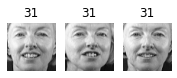

cluster 48


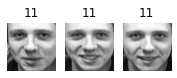

cluster 49


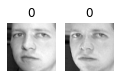

cluster 50


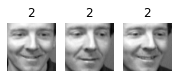

cluster 51


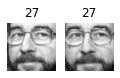

cluster 52


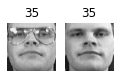

cluster 53


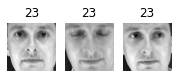

cluster 54


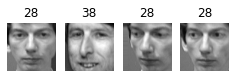

cluster 55


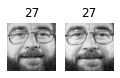

cluster 56


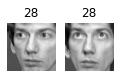

cluster 57


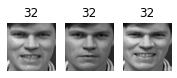

cluster 58


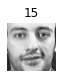

cluster 59


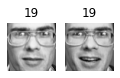

cluster 60


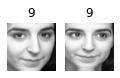

cluster 61


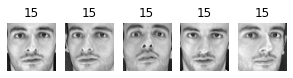

cluster 62


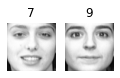

cluster 63


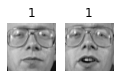

cluster 64


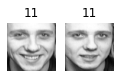

cluster 65


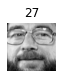

cluster 66


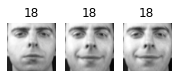

cluster 67


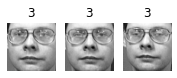

cluster 68


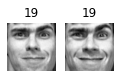

cluster 69


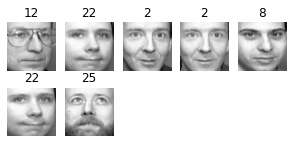

cluster 70


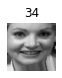

cluster 71


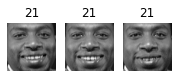

cluster 72


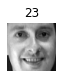

cluster 73


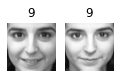

cluster 74


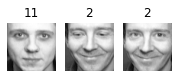

cluster 75


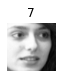

cluster 76


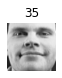

cluster 77


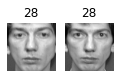

cluster 78


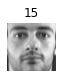

cluster 79


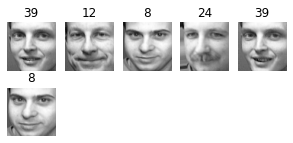

cluster 80


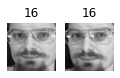

cluster 81


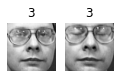

cluster 82


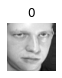

cluster 83


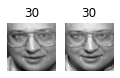

cluster 84


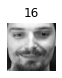

In [34]:
best_model=kmeans_list[best_index]

def plot_faces(faces,labels,n_cols=5):
  faces=faces.reshape(-1,64,64)
  n_rows=(len(faces)-1) // n_cols+1
  plt.figure(figsize=(n_cols,n_rows * 1.1))
  for index,(face,label) in enumerate(zip(faces,labels)):
    plt.subplot(n_rows,n_cols,index + 1)
    plt.imshow(face,cmap='gray')
    plt.axis('off')
    plt.title(label)
  plt.show()

for cluster_id in np.unique(best_model.labels_):
  print('cluster',cluster_id)
  in_cluster=best_model.labels_ == cluster_id
  faces=X_train[in_cluster]
  labels=y_train[in_cluster]
  plot_faces(faces,labels)
